In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
# load dataset
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
# bring first two columns (spam/ham and text)
data = data[data.columns[:2]]
data.columns = ['category', 'text']

In [4]:
# remove the duplicated data
data.drop_duplicates(subset=['text'], inplace=True) 

In [5]:
data.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# set ham to 0 and spam to 1 - for classification
data['category'] = data['category'].replace(['ham','spam'],[0,1])

In [7]:
X_data = data['text']
y_data = data['category']

In [8]:
# tokenize before training with RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

word_to_index = tokenizer.word_index

voca_size = len(word_to_index) + 1

In [9]:
# separate dataset into two - train : test = 8 : 2
num_of_train = int(len(sequences) * 0.8)
num_of_test = int(len(sequences) - num_of_train)

In [10]:
# padding data (with the maximum length of the text(message))
X_data = sequences

max_len = 189
data = pad_sequences(X_data, maxlen = max_len)

In [11]:
X_test = data[num_of_test:] 
y_test = np.array(y_data[num_of_test:]) 
X_train = data[:num_of_train] 
y_train = np.array(y_data[:num_of_train])

In [21]:
model = Sequential()
model.add(Embedding(voca_size, 256))
model.add(SimpleRNN(256, activation = 'relu')) # training with 256 hidden layers & activation function is relu (same as ELMo's)
# modified version
# model.add(SimpleRNN(256, activation = 'relu', kernel_regularizer='l2')) # including regularization
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['acc']) # 20% data for each epoch is used for testing

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 25s 466ms/step - loss: 0.3091 - acc: 0.8706 - val_loss: 0.1754 - val_acc: 0.8755
Epoch 2/10
52/52 [==============================] - 24s 461ms/step - loss: 0.2402 - acc: 0.9389 - val_loss: 0.1250 - val_acc: 0.9577
Epoch 3/10
52/52 [==============================] - 24s 462ms/step - loss: 2.1900 - acc: 0.9903 - val_loss: 0.1498 - val_acc: 0.9734
Epoch 4/10
52/52 [==============================] - 24s 460ms/step - loss: 0.0763 - acc: 0.9924 - val_loss: 0.0999 - val_acc: 0.9722
Epoch 5/10
52/52 [==============================] - 24s 464ms/step - loss: 0.0313 - acc: 0.9930 - val_loss: 0.0837 - val_acc: 0.9722
Epoch 6/10
52/52 [==============================] - 24s 463ms/step - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0702 - val_acc: 0.9807
Epoch 7/10
52/52 [==============================] - 24s 467ms/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.0544 - val_acc: 0.9843
Epoch 8/10
52/52 [==============================] - 24s 461ms/step - 

In [23]:
print("\nTest_accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

130/130 [==============================] - 6s 48ms/step - loss: 0.0521 - acc: 0.9944

Test_accuracy : 0.9944


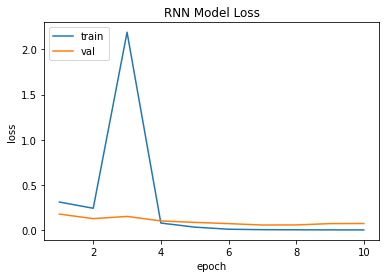

In [24]:
# draw a graph
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()